In [275]:
%matplotlib inline

In [276]:
import gmaps
import numpy as np
import pandas as pd
import requests
from itertools import islice
from us import states
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import json
from census import Census
import statistics







In [246]:
#Import various files
median_price_by_state = pd.read_csv(r"C:\Users\alexk\OneDrive\Desktop\BootCamp\Alex Github Folders\JAM-Project-1-NUBootCamp\StateMedianIHomePrice2017.csv")

median_income_by_state = pd.read_csv(r"C:\Users\alexk\OneDrive\Desktop\BootCamp\Alex Github Folders\JAM-Project-1-NUBootCamp\StateMedianIncome2017.csv")

zip_code_coordinates = pd.read_csv(r"C:\Users\alexk\OneDrive\Desktop\BootCamp\Alex Github Folders\JAM-Project-1-NUBootCamp\ZipCodeCoordinates.csv")

price_change_by_zip = pd.read_csv(r"C:\Users\alexk\OneDrive\Desktop\BootCamp\Alex Github Folders\JAM-Project-1-NUBootCamp\ZipCodeHomepriceincrease.csv")

census2017 = pd.read_csv(r"C:\Users\alexk\OneDrive\Desktop\BootCamp\Alex Github Folders\JAM-Project-1-NUBootCamp\census_data_2017.csv")

In [5]:
#Display
median_price_by_state.head(3)

,State,Median Home Price
0,Alabama,130500
1,Alaska,305800
2,Arizona,252300


In [6]:
#Display
median_income_by_state.head(3)

,State,Median Household Income
0,Maryland,81084
1,Washington,75418
2,New Hampshire,74801


In [160]:
#Merge data frames
price_income = pd.merge(median_price_by_state, median_income_by_state, on=["State"])

price_income.head(3)

,State,Median Home Price,Median Household Income
0,Alabama,130500,51113
1,Alaska,305800,72231
2,Arizona,252300,61125


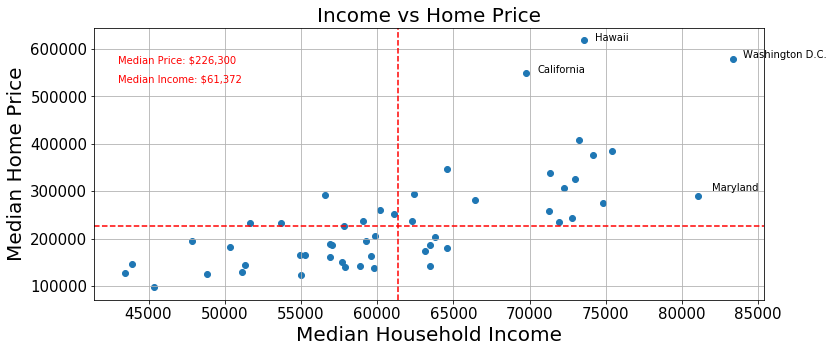

In [273]:
#This scatter plot will show a relationship between median household income and median home price. 
plt.scatter(price_income["Median Household Income"],price_income["Median Home Price"], marker = "o")

#Format plot
plt.title("Income vs Home Price", fontsize=20)
plt.xlabel("Median Household Income", fontsize=20)
plt.ylabel("Median Home Price", fontsize=20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.axhline(226300, color = "red",ls = "--", alpha =1)
plt.axvline(61372, color = "red",ls = "--", alpha =1)
plt.text(74300,617900,"Hawaii")
plt.text(82000,300000,"Maryland")
plt.text(84000,581000,"Washington D.C.")
plt.text(70500,550000,"California")
plt.text(43000,570000,"Median Price: $226,300", color = "red")
plt.text(43000,530000,"Median Income: $61,372", color = "red")

plt.grid(True)

#Change size of figure
fig = plt.gcf()
fig.set_size_inches(12,5)

#Save the figure  
plt.savefig("Income vs Home Price.png",bbox_inches="tight") 

plt.show()

In [250]:
#Calculate the ratio of home price to household income
price_income["Price to Income"] = (price_income["Median Home Price"]/price_income["Median Household Income"])


price_income.head()

,State,Median Home Price,Median Household Income,Price to Income
0,Alabama,130500,51113,2.553167
1,Alaska,305800,72231,4.233639
2,Arizona,252300,61125,4.127607
3,Arkansas,126200,48829,2.584530
4,California,548800,69759,7.867085


In [191]:
#Calculate the median Price to Income ratio
price_income.loc[:,"Price to Income"].median()

3.4398690845940623

In [205]:
#Remove California, Washington DC and Hawaii to recalculate median Price to Income ratio.
#This was done to see if there is a big change in the median price to income ratio as these three states look to be outliers
#The difference was not material and this would not be used.
price_income_modified= price_income.set_index("State")

price_income_modified = price_income_modified.drop(["California","Washington D.C.", "Hawaii"], axis=0)
price_income_modified.head()

,Median Home Price,Median Household Income,Price to Income
State,,,
Alabama,130500,51113,2.553167
Alaska,305800,72231,4.233639
Arizona,252300,61125,4.127607
Arkansas,126200,48829,2.584530
Colorado,376800,74172,5.080084


In [206]:
#Calculate the median Price to Income ratio
price_income_modified.loc[:,"Price to Income"].median()

3.35178558564652

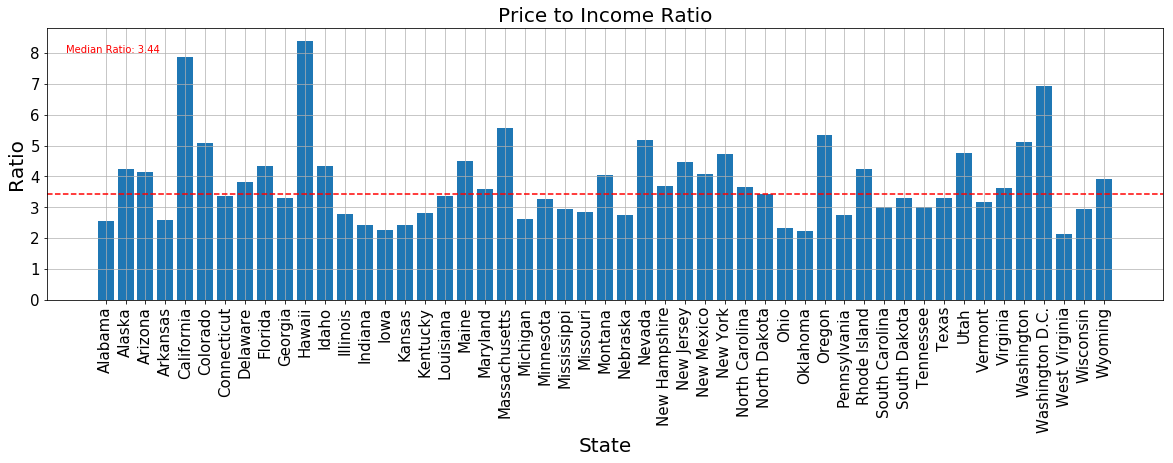

In [208]:
#This bar graph will show the price to income ratio by state 
x_axis = np.arange(len(price_income))
tick_locations = [value for value in x_axis]
plt.bar(x_axis,price_income["Price to Income"], align="center")
plt.xticks(tick_locations,price_income["State"], rotation="vertical")

#Format plot
plt.title("Price to Income Ratio", fontsize=20)
plt.xlabel("State", fontsize=20)
plt.ylabel("Ratio", fontsize=20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.gca().grid(True, linewidth=0.7, linestyle='-')
plt.axhline(3.44, color = "red",ls = "--", alpha =1)
plt.text(-2,8,"Median Ratio: 3.44", color = "red")

#Change size of figure
fig = plt.gcf()
fig.set_size_inches(20,5)


#Save the figure  
plt.savefig("Price to Income Ratio.png",bbox_inches="tight") 

plt.show()

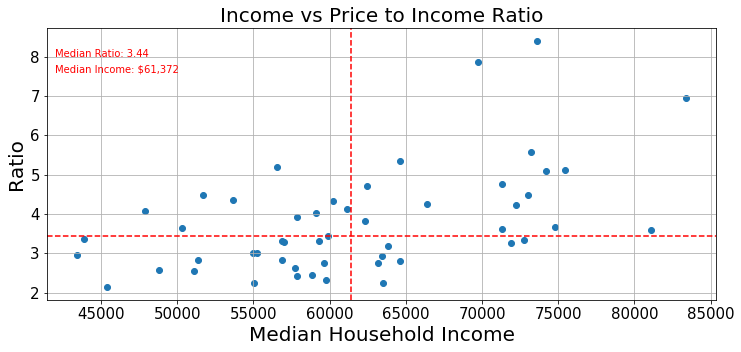

In [277]:
#This scatter plot will show if there is a relationship between median household income and price to income ratio
plt.scatter(price_income["Median Household Income"],price_income["Price to Income"], marker = "o")

#Format plot 
plt.title("Income vs Price to Income Ratio", fontsize=20)
plt.xlabel("Median Household Income", fontsize=20)
plt.ylabel("Ratio", fontsize=20)
plt.grid(True)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.axhline(3.44, color = "red",ls = "--", alpha =1)
plt.axvline(61372, color = "red",ls = "--", alpha =1)
plt.text(42000,8,"Median Ratio: 3.44", color = "red")
plt.text(42000,7.6,"Median Income: $61,372", color = "red")

#Change size of figure
fig = plt.gcf()
fig.set_size_inches(12,5)

#Save the figure  
plt.savefig("Income vs Price to Income Ratio.png",bbox_inches="tight") 

plt.show()

In [278]:
#Display info
zip_code_coordinates.head()

,Zip Code,Latitude,Longitude
0,99553,54.1430,-165.7854
1,99571,55.1858,-162.7211
2,99583,54.8542,-163.4113
3,99612,55.0628,-162.3056
4,99661,55.3192,-160.4914


In [280]:
#Display info
price_change_by_zip.head()



,State Code,State,Zip Code,City,Beginning 2000,End 2018,% Increase
0,NY,New York,10025,New York,305100,1051300,344.58
1,IL,Illinois,60657,Chicago,212600,353200,166.13
2,NY,New York,10023,New York,516100,1373100,266.05
3,TX,Texas,77494,Katy,311700,335900,107.76
4,IL,Illinois,60614,Chicago,257500,432400,167.92


In [251]:
#Merge zip_code_coordinates and price_change_by_zip into one
price_change_w_coordinates = pd.merge(price_change_by_zip, zip_code_coordinates, on=["Zip Code"])

price_change_w_coordinates.head()

,State Code,State,Zip Code,City,Beginning 2000,End 2018,% Increase,Latitude,Longitude
0,NY,New York,10025,New York,305100,1051300,344.58,40.7975,-73.9683
1,IL,Illinois,60657,Chicago,212600,353200,166.13,41.9399,-87.6528
2,NY,New York,10023,New York,516100,1373100,266.05,40.7764,-73.9827
3,TX,Texas,77494,Katy,311700,335900,107.76,29.7404,-95.8304
4,IL,Illinois,60614,Chicago,257500,432400,167.92,41.9229,-87.6483


# Census Data

In [248]:
#Display info
census2017.head()

,Zipcode,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Unemployment Rate,Bachelors Degree,Commute Time by Auto in Min,Commute Time by Public Transp in Min,Employable People in the Labor Force
0,601,17599.0,38.9,11757.0,7041.0,11282.0,64.105915,13.943974,1787.0,NaN,NaN,5953.0
1,602,39209.0,40.9,16190.0,8978.0,20428.0,52.100283,6.473004,3694.0,NaN,NaN,14390.0
2,603,50135.0,40.4,16645.0,10897.0,25176.0,50.216416,7.156677,5858.0,NaN,NaN,16044.0
3,606,6304.0,42.8,13387.0,5960.0,4092.0,64.911168,3.236041,321.0,NaN,NaN,1707.0
4,610,27590.0,41.4,18741.0,9266.0,12553.0,45.498369,5.342515,2268.0,NaN,NaN,10048.0


In [257]:
#Rename column name in order to be able to merge by zip code
census2017 = census2017.rename(columns={"Zipcode":"Zip Code"})
census2017.head()

,Zip Code,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Unemployment Rate,Bachelors Degree,Commute Time by Auto in Min,Commute Time by Public Transp in Min,Employable People in the Labor Force
0,601,17599.0,38.9,11757.0,7041.0,11282.0,64.105915,13.943974,1787.0,NaN,NaN,5953.0
1,602,39209.0,40.9,16190.0,8978.0,20428.0,52.100283,6.473004,3694.0,NaN,NaN,14390.0
2,603,50135.0,40.4,16645.0,10897.0,25176.0,50.216416,7.156677,5858.0,NaN,NaN,16044.0
3,606,6304.0,42.8,13387.0,5960.0,4092.0,64.911168,3.236041,321.0,NaN,NaN,1707.0
4,610,27590.0,41.4,18741.0,9266.0,12553.0,45.498369,5.342515,2268.0,NaN,NaN,10048.0


In [281]:
#Merge census and price_change_w_coordinates by zip code
prices_census = pd.merge(price_change_w_coordinates, census2017, on=["Zip Code"])

prices_census.head()

,State Code,State,Zip Code,City,Beginning 2000,End 2018,% Increase,Latitude,Longitude,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Unemployment Rate,Bachelors Degree,Commute Time by Auto in Min,Commute Time by Public Transp in Min,Employable People in the Labor Force
0,NY,New York,10025,New York,305100,1051300,344.58,40.7975,-73.9683,94382.0,41.7,82352.0,68995.0,14370.0,15.225361,3.904346,21437.0,112885.0,1144590.0,52175.0
1,IL,Illinois,60657,Chicago,212600,353200,166.13,41.9399,-87.6528,70103.0,31.2,88708.0,69983.0,6077.0,8.668673,2.193915,25738.0,524945.0,896990.0,51877.0
2,NY,New York,10023,New York,516100,1373100,266.05,40.7764,-73.9827,61514.0,42.6,123951.0,114641.0,4862.0,7.903892,2.357187,15870.0,59730.0,674730.0,36910.0
3,TX,Texas,77494,Katy,311700,335900,107.76,29.7404,-95.8304,105854.0,34.8,137600.0,48249.0,4095.0,3.868536,2.274831,23686.0,1315015.0,69125.0,50315.0
4,IL,Illinois,60614,Chicago,257500,432400,167.92,41.9229,-87.6483,70225.0,30.2,100116.0,73991.0,6699.0,9.539338,2.053400,24433.0,523645.0,618200.0,47830.0


In [259]:
#Calculate the ratio of employable people with Bachelor's degrees
prices_census["Bachelors Degrees Ratio"] = (prices_census["Bachelors Degree"]/prices_census["Employable People in the Labor Force"])

prices_census.head()

,State Code,State,Zip Code,City,Beginning 2000,End 2018,% Increase,Latitude,Longitude,Population,...,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Unemployment Rate,Bachelors Degree,Commute Time by Auto in Min,Commute Time by Public Transp in Min,Employable People in the Labor Force,Bachelors Degrees Ratio
0,NY,New York,10025,New York,305100,1051300,344.58,40.7975,-73.9683,94382.0,...,82352.0,68995.0,14370.0,15.225361,3.904346,21437.0,112885.0,1144590.0,52175.0,0.410867
1,IL,Illinois,60657,Chicago,212600,353200,166.13,41.9399,-87.6528,70103.0,...,88708.0,69983.0,6077.0,8.668673,2.193915,25738.0,524945.0,896990.0,51877.0,0.496135
2,NY,New York,10023,New York,516100,1373100,266.05,40.7764,-73.9827,61514.0,...,123951.0,114641.0,4862.0,7.903892,2.357187,15870.0,59730.0,674730.0,36910.0,0.429965
3,TX,Texas,77494,Katy,311700,335900,107.76,29.7404,-95.8304,105854.0,...,137600.0,48249.0,4095.0,3.868536,2.274831,23686.0,1315015.0,69125.0,50315.0,0.470754
4,IL,Illinois,60614,Chicago,257500,432400,167.92,41.9229,-87.6483,70225.0,...,100116.0,73991.0,6699.0,9.539338,2.053400,24433.0,523645.0,618200.0,47830.0,0.510830


In [142]:
#Save data to csv to review
prices_census.to_csv("Merged with Census.csv")

In [145]:
#Filter data to exclude zip codes with population of less than 10,000 people to remove noise. 
prices_census_filtered_by_population = prices_census.query("Population>10000")

#Calculate the median home price % Increase to use for the graphs
prices_census_filtered_by_population.loc[:, "% Increase"].median()

191.29500000000002

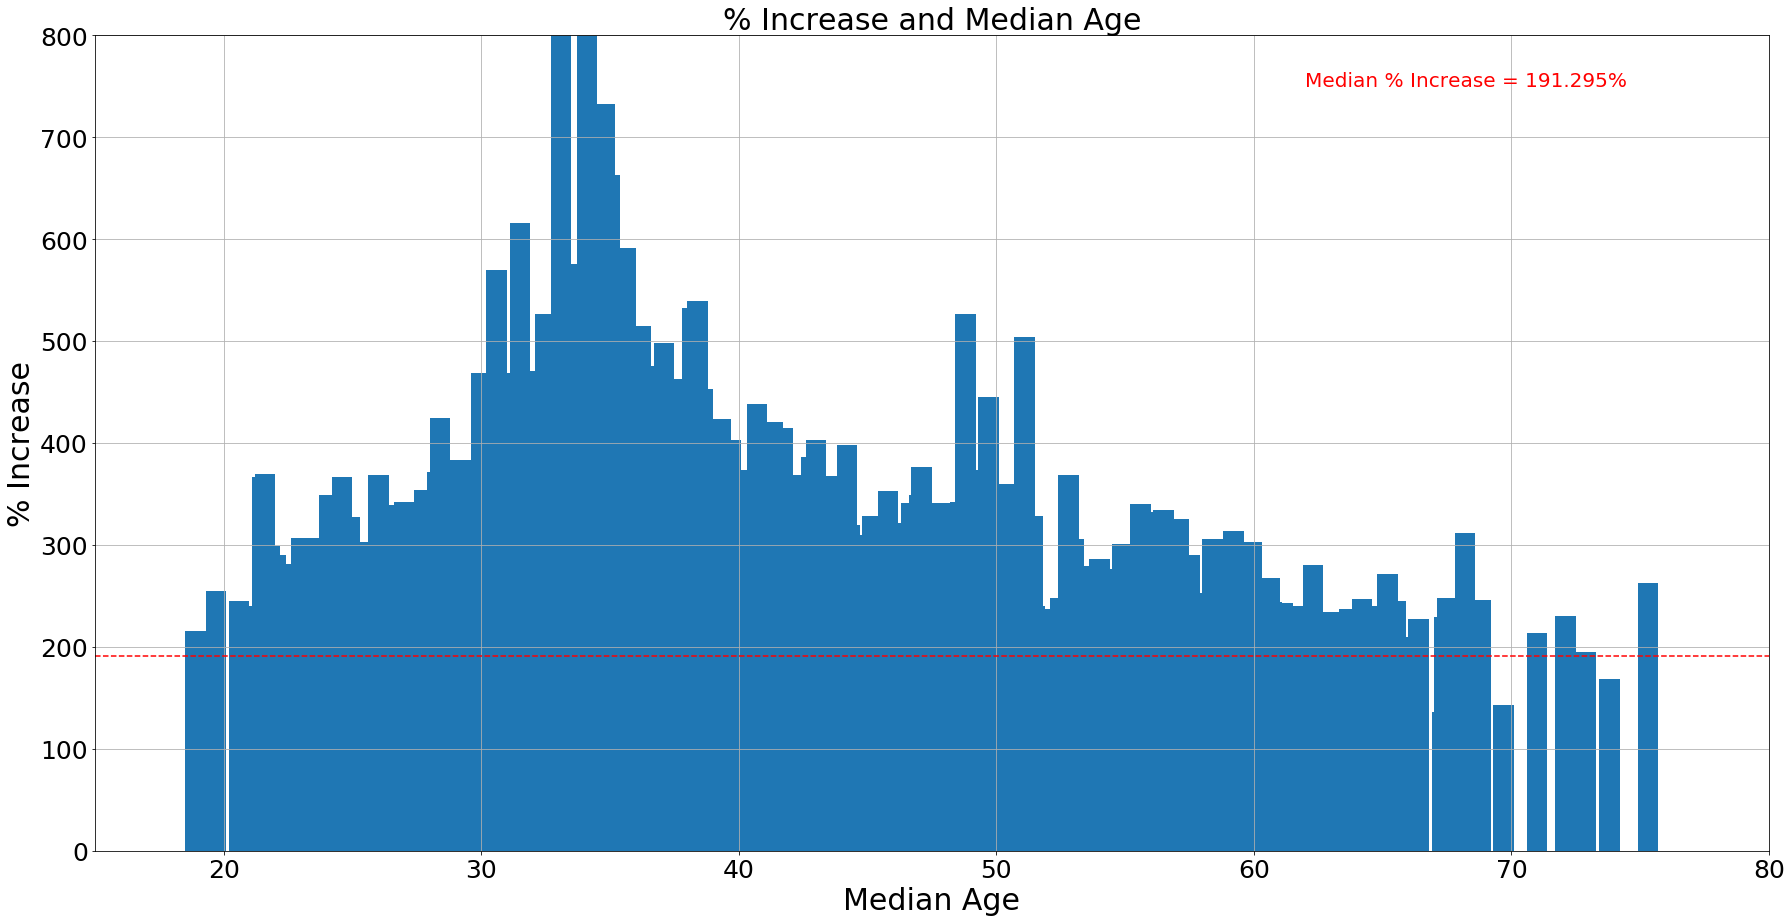

In [282]:
#This bar graph will show a relationship between median age and home price % increase
plt.bar(prices_census_filtered_by_population["Median Age"],prices_census_filtered_by_population["% Increase"])

#Format the graph
plt.title("% Increase and Median Age", fontsize = 30)
plt.ylabel("% Increase", fontsize = 30)
plt.xlabel("Median Age", fontsize = 30)
plt.ylim(0,800)
plt.xlim(15,80)
plt.grid(True)
plt.xticks(size = 25)
plt.yticks(size = 25)
plt.axhline(191.295, color = "red",ls = "--", alpha =1)
plt.text(62,750,"Median % Increase = 191.295%", color = "red", fontsize= 20)

#Resize the graph
fig = plt.gcf()
fig.set_size_inches(30,15)


plt.show()

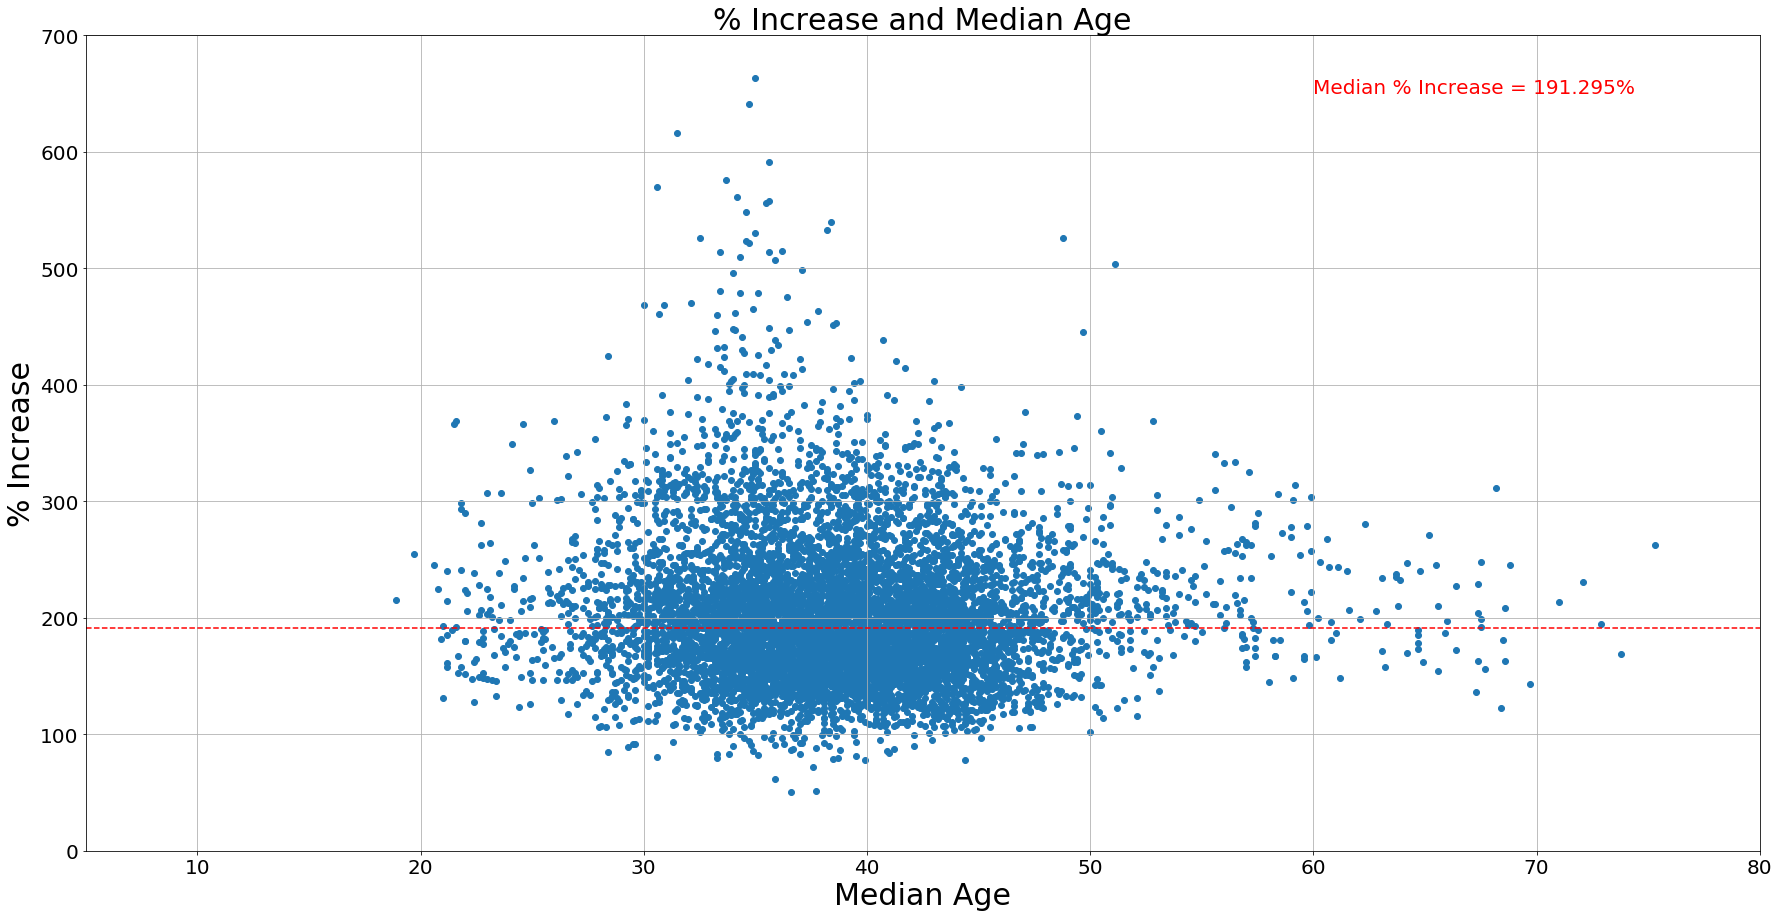

In [284]:
#This scatter plot graph will show a relationship between median age and home price % increase. It is the same as the above bar graph but it provides a better view for the relationship

plt.scatter(prices_census_filtered_by_population["Median Age"],prices_census_filtered_by_population["% Increase"], marker = "o", 
            )
#Format the plot
plt.title("% Increase and Median Age", fontsize = 30)
plt.ylabel("% Increase", fontsize = 30)
plt.xlabel("Median Age", fontsize = 30)
plt.ylim(0,700)
plt.xlim(5,80)
plt.grid(True)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.axhline(191.295, color = "red",ls = "--", alpha =1)
plt.text(60,650,"Median % Increase = 191.295%", color = "red", fontsize= 20)

#Resize the plot
fig = plt.gcf()
fig.set_size_inches(30,15)


#Save the figure  
plt.savefig("% Increase and Median Age.png",bbox_inches="tight") 

plt.show()

In [283]:
#Calculate hte median poverty rate

prices_census_filtered_by_population.loc[:, "Poverty Rate"].median()

11.262665389999999

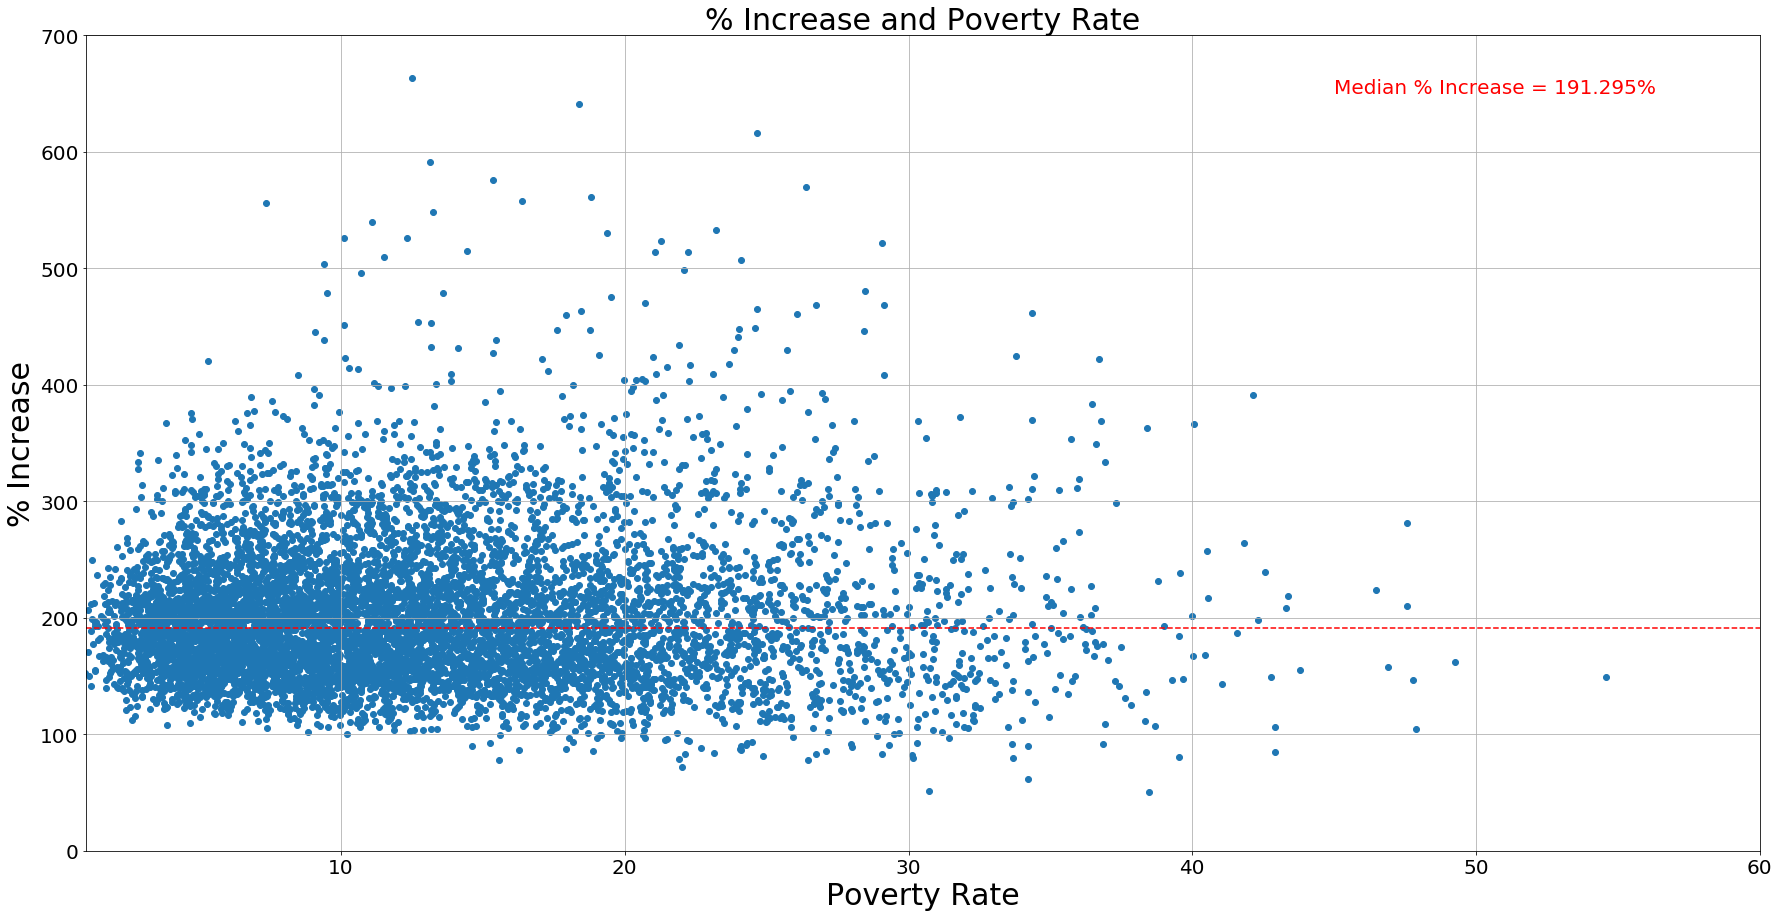

In [286]:
#This scatter plot graph will show a relationship between poverity rate and home price % increase.

plt.scatter(prices_census_filtered_by_population["Poverty Rate"],prices_census_filtered_by_population["% Increase"], marker = "o", 
           )
#Format plot
plt.title("% Increase and Poverty Rate", fontsize = 30)
plt.ylabel("% Increase", fontsize = 30)
plt.xlabel("Poverty Rate", fontsize = 30)
plt.ylim(0,700)
plt.xlim(1,60)
plt.grid(True)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.axhline(191.295, color = "red",ls = "--", alpha =1)
plt.text(45,650,"Median % Increase = 191.295%", color = "red", fontsize= 20)

#Resize plot
fig = plt.gcf()
fig.set_size_inches(30,15)


#Save the figure  
plt.savefig("% Increase and Poverty Rate.png",bbox_inches="tight") 

plt.show()

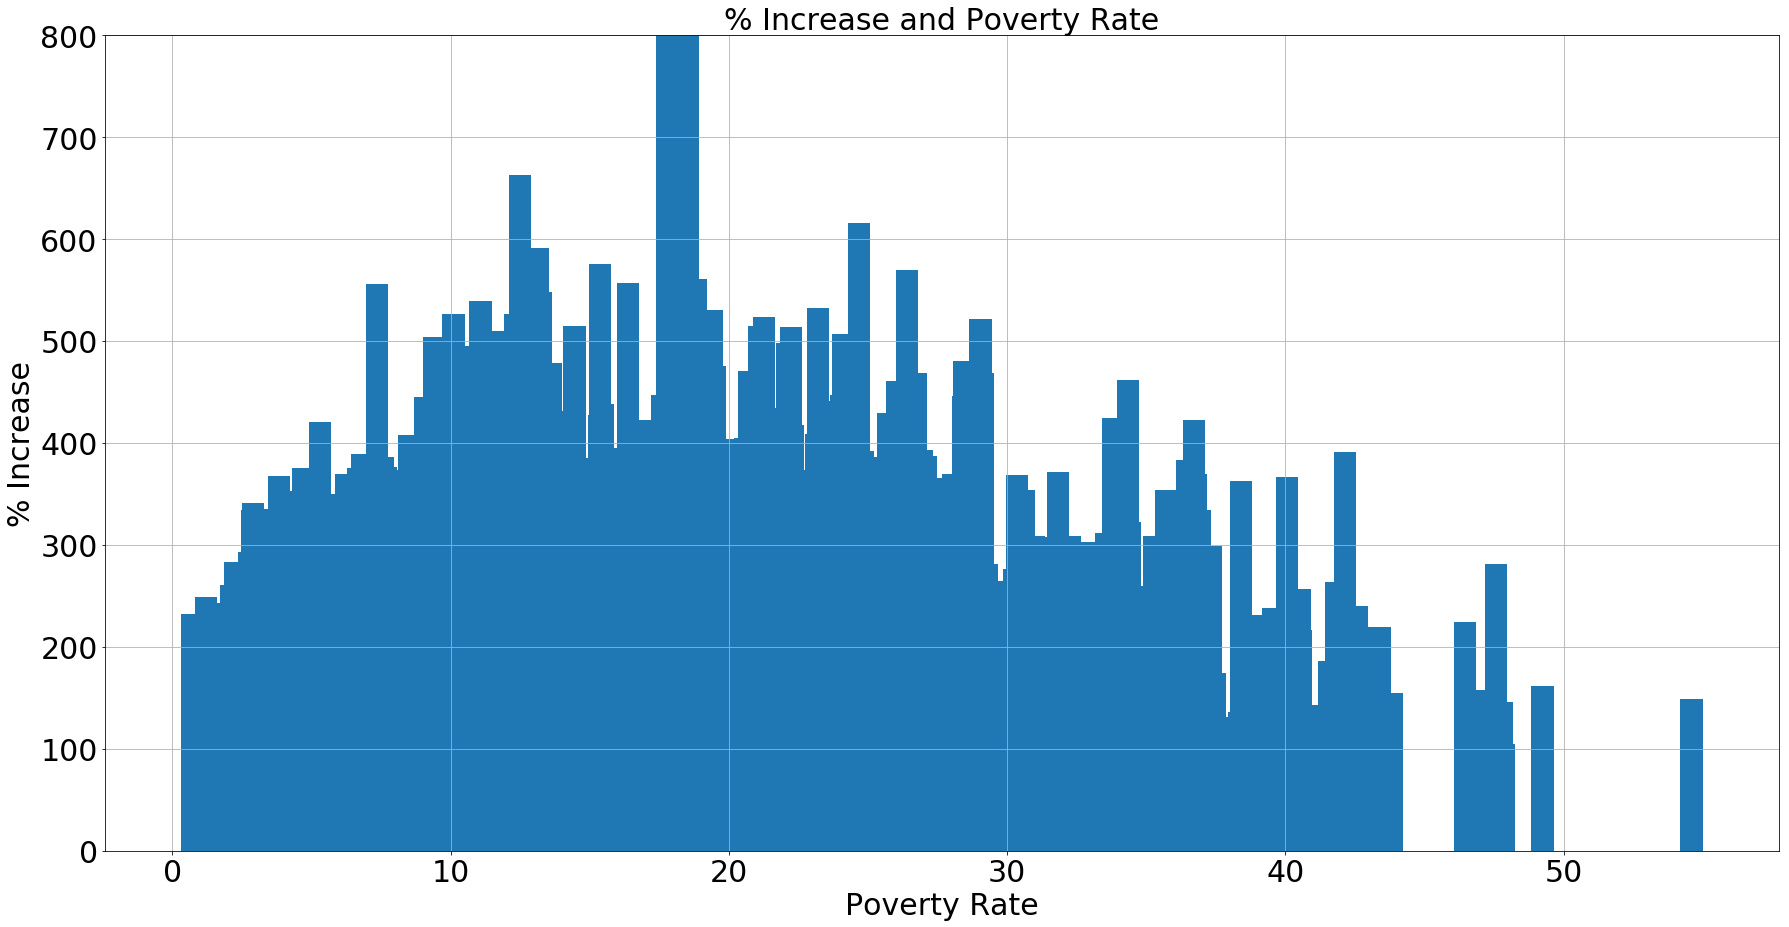

In [138]:
#This bar graph graph will show a relationship between poverity rate and home price % increase as a method of different presentation.

plt.bar(prices_census_filtered_by_population["Poverty Rate"],prices_census_filtered_by_population["% Increase"])

#Format bar graph
plt.title("% Increase and Poverty Rate", fontsize = 30)
plt.ylabel("% Increase", fontsize = 30)
plt.xlabel("Poverty Rate", fontsize = 30)
plt.ylim(0,800)
plt.grid(True)
plt.xticks(size = 30)
plt.yticks(size = 30)
fig = plt.gcf()
fig.set_size_inches(30,15)

plt.show()

In [225]:
#Calculate median unemployment rate for reference. Not used
prices_census_filtered_by_population.loc[:, "Unemployment Rate"].median()

2.94696192

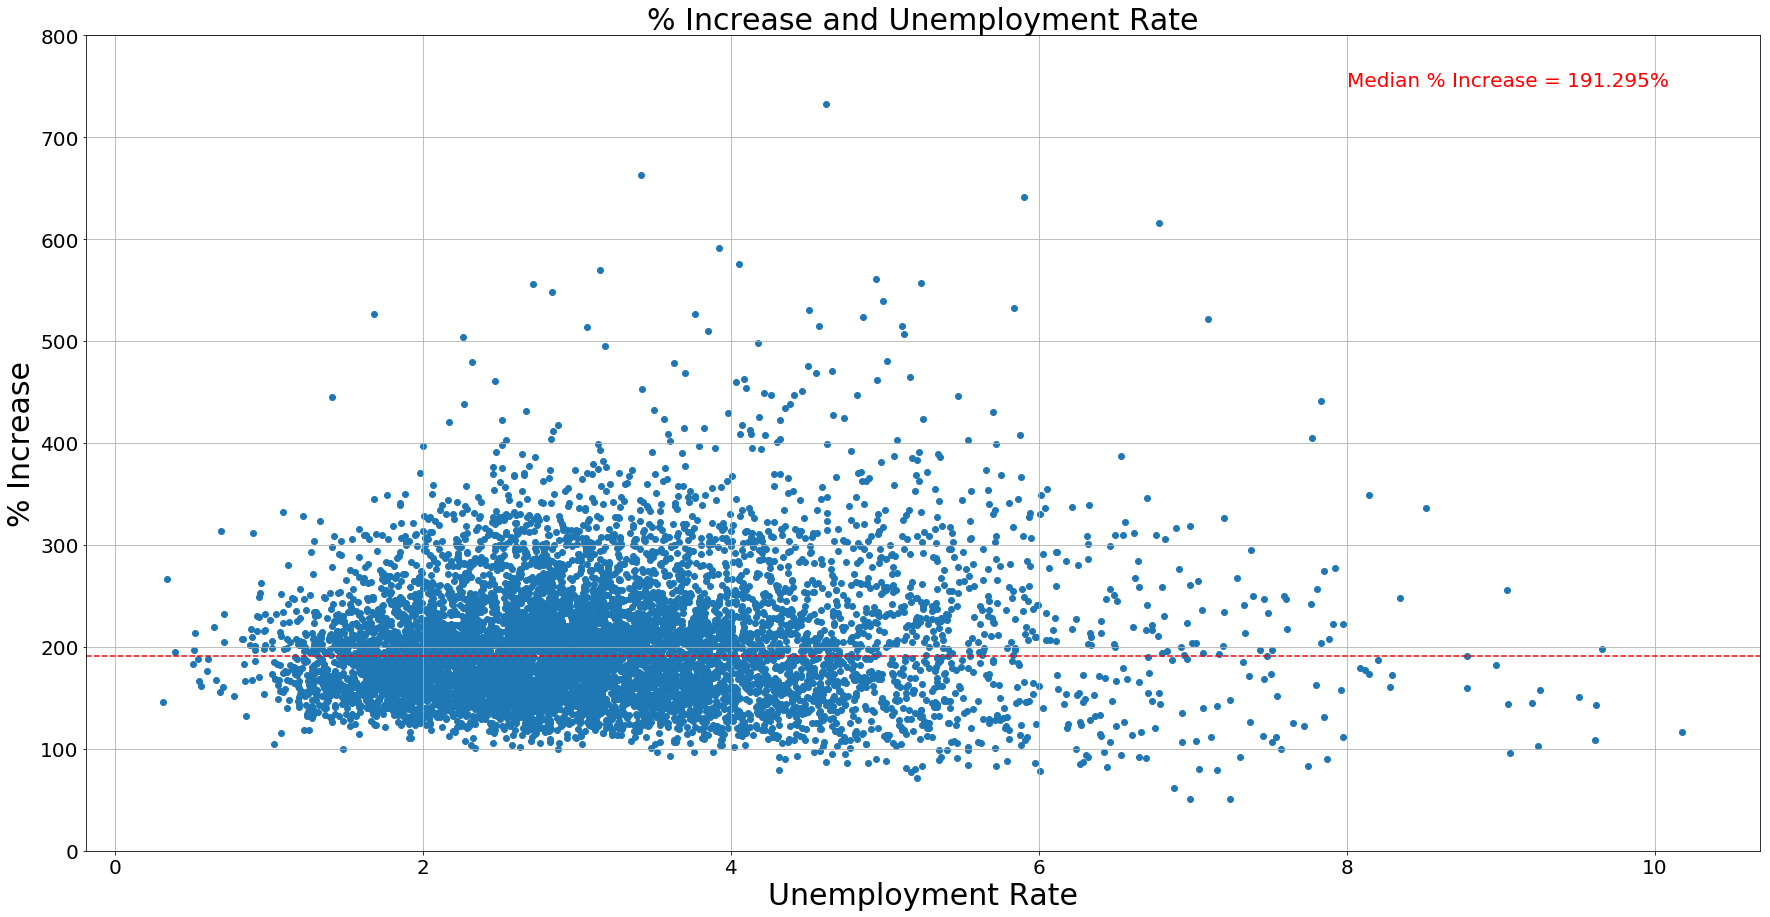

In [287]:
#This scatter plot graph will show a relationship between unemployment rate and home price % increase.
plt.scatter(prices_census_filtered_by_population["Unemployment Rate"],prices_census_filtered_by_population["% Increase"], marker = "o")

#Format plot
plt.title("% Increase and Unemployment Rate", fontsize = 30)
plt.ylabel("% Increase", fontsize = 30)
plt.xlabel("Unemployment Rate", fontsize = 30)
plt.ylim(0,800)
plt.grid(True)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.axhline(191.295, color = "red",ls = "--", alpha =1)
plt.text(8,750,"Median % Increase = 191.295%", color = "red", fontsize= 20)

#Resize plot
fig = plt.gcf()
fig.set_size_inches(30,15)


#Save the figure  
plt.savefig("% Increase and Unemployment Rate.png",bbox_inches="tight") 


plt.show()

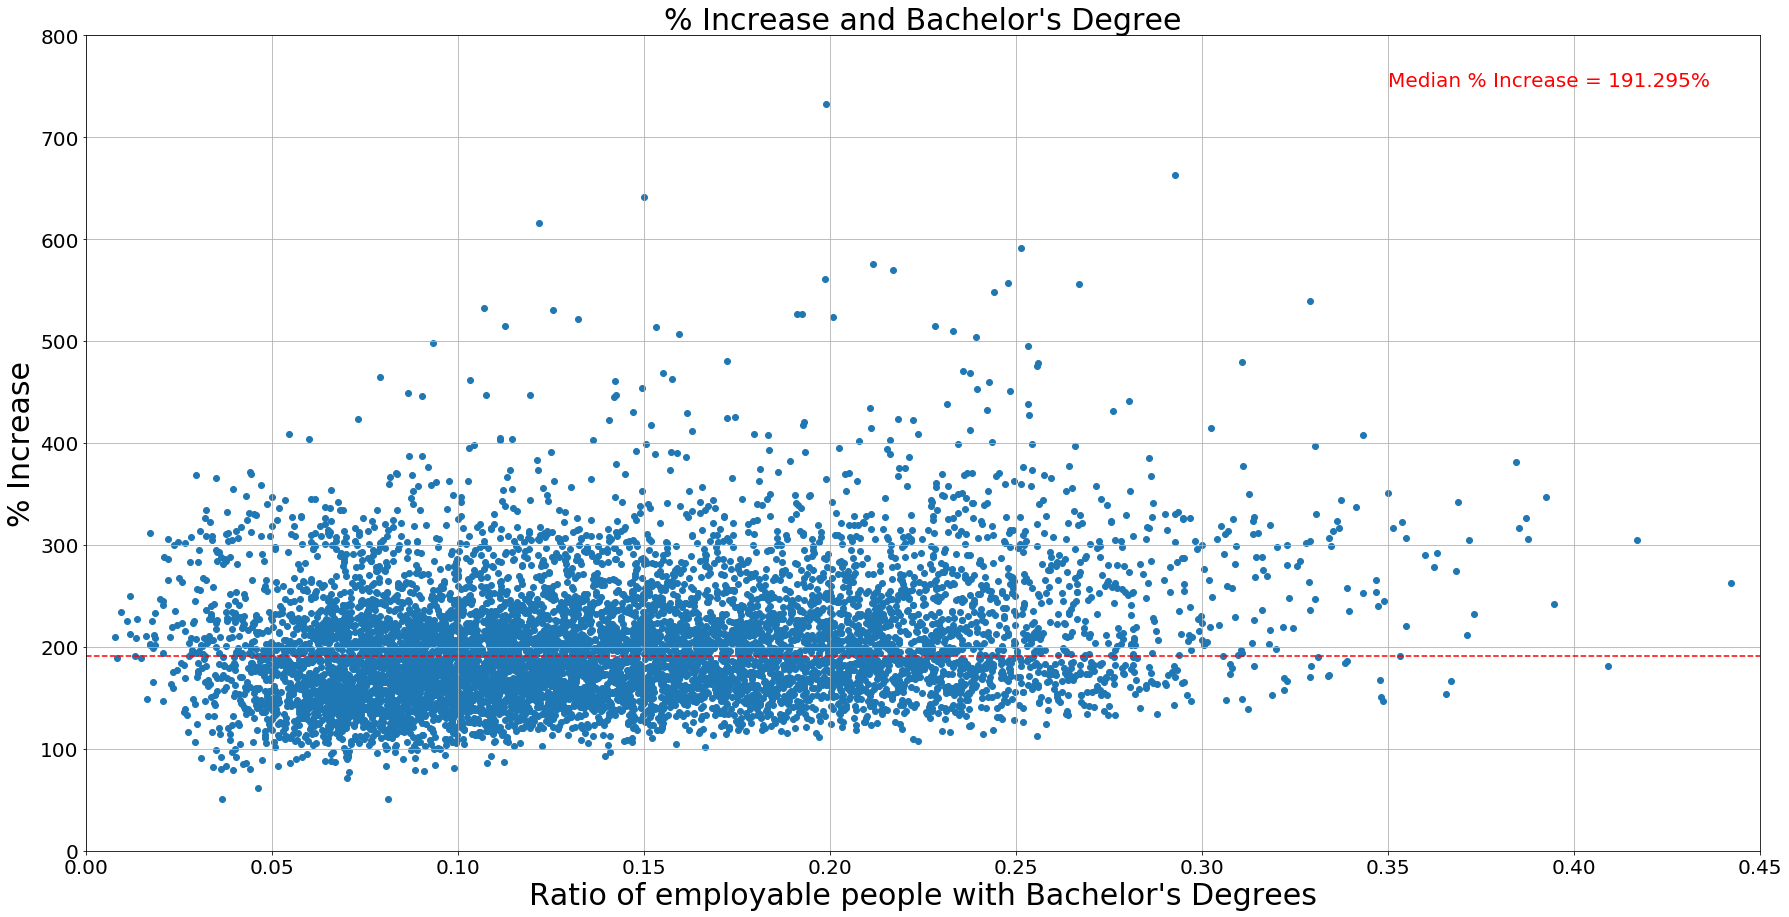

In [269]:
#This scatter plot graph will show a relationship between employable people with Bachelor's degrees and home price % increase.

plt.scatter(prices_census_filtered_by_population["Bachelors Degrees Ratio"],prices_census_filtered_by_population["% Increase"], marker = "o",)

#Format plot
plt.title("% Increase and Bachelor's Degree", fontsize = 30)
plt.ylabel("% Increase", fontsize = 30)
plt.xlabel("Ratio of employable people with Bachelor's Degrees", fontsize = 30)
plt.ylim(0,800)
plt.xlim(0,0.45)
plt.grid(True)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.axhline(191.295, color = "red",ls = "--", alpha =1)
plt.text(0.35,750,"Median % Increase = 191.295%", color = "red", fontsize= 20)

#Resize plot
fig = plt.gcf()
fig.set_size_inches(30,15)

#Save the figure  
plt.savefig("% Increase and Ratio with Bachelors.png",bbox_inches="tight") 


plt.show()